## EZKL Jupyter Notebook Demo 

To get started install [miniconda](https://docs.conda.io/en/latest/miniconda.html) for your system. From there create an new evironment:

```bash
conda create -n ezkl python=3.9
```

Activate your newly created environment and install the requisite dependencies:

```bash
conda activate ezkl; pip install torch numpy ezkl;     
```

Now within this repository install the python bindings: 

```bash 

pip install -r requirements.txt
maturin develop --features python-bindings

```

💎 You should now be able to run the rest of the notebook 💎


In [ ]:
# here we create and (potentially train a model)
import numpy as np
from PIL import Image
from torch import nn
from ezkl import export
import ezkl_lib
import os
import json 
import matplotlib.pyplot as plt
%matplotlib inline


# Defines the model
# we got convs, we got relu, we got linear layers 
# What else could one want ???? 

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=5, stride=2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        return (x)

input_shape = [1,28,28]
# input_shape = (1, 3, 1200, 1200)

# # Processing for ssd-12.onnx
# def preprocess(img_path):
#     input_shape = (1, 3, 1200, 1200)
#     img = Image.open(img_path)
#     img = img.resize((1200, 1200), Image.BILINEAR)
#     img_data = np.array(img)
#     img_data = np.transpose(img_data, [2, 0, 1])
#     img_data = np.expand_dims(img_data, 0)
#     mean_vec = np.array([0.485, 0.456, 0.406])
#     stddev_vec = np.array([0.229, 0.224, 0.225])
#     norm_img_data = np.zeros(img_data.shape).astype('float32')
#     for i in range(img_data.shape[1]):
#         norm_img_data[:,i,:,:] = (img_data[:,i,:,:]/255 - mean_vec[i]) / stddev_vec[i]
#     return norm_img_data

circuit = MyModel()
export(circuit, input_shape )

In [ ]:
output_path = os.path.join('input.json')

data_path = os.path.join('input.json')

model_path = os.path.join('network.onnx')

res = ezkl_lib.forward(data_path, model_path, output_path)

with open(output_path, "r") as f:    data = json.load(f)

In [1]:
# Use our Game input

In [22]:
# HERE WE SETUP THE CIRCUIT PARAMS 

params_path = os.path.join('kzg.params')

res = ezkl_lib.gen_srs(params_path, 17)


In [37]:
pk_path = os.path.join('test.pk')
vk_path = os.path.join('test.vk')
circuit_params_path = os.path.join('circuit.params')
params_path = os.path.join('kzg.params')

res = ezkl_lib.setup(data_path, model_path, vk_path, pk_path, params_path, circuit_params_path)

assert res == True
assert os.path.isfile(vk_path)
assert os.path.isfile(pk_path)
assert os.path.isfile(circuit_params_path)

OSError: Failed to process model

In [ ]:
# GENERATE A PROOF 
proof_path = os.path.join('test.pf')

res = ezkl_lib.prove(
        data_path,
        model_path,
        pk_path,
        proof_path,
        params_path,
        "poseidon",
        "single",
        circuit_params_path
    )

assert res == True
assert os.path.isfile(proof_path)

In [ ]:
# VERIFY IT 
proof_path = os.path.join('test.pf')

res = ezkl_lib.verify(
        proof_path,
        circuit_params_path,
        vk_path,
        params_path,
    )

assert res == True
print("verified")

In [33]:
f = open('input.json')

In [34]:
data = json.load(f)


In [49]:
len(data['output_data'][0])

288

In [79]:
input_ = data['input_data'][0]
output_ = data['output_data'][0]

In [84]:
out_data = np.array(output_)
in_data = np.array(input_)

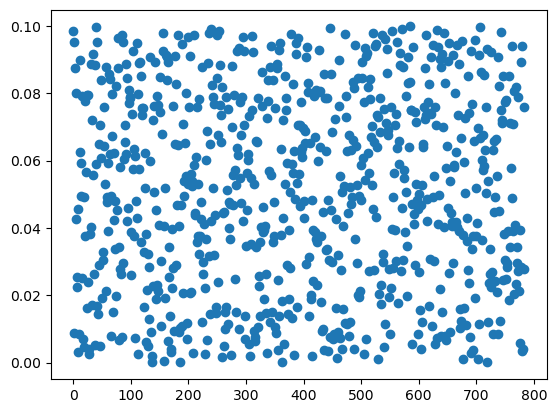

In [124]:
plt.plot(in_data, "o")

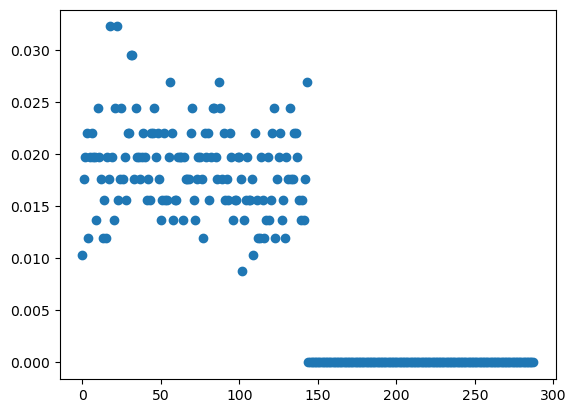

In [125]:
plt.plot(out_data, "o")

In [113]:
out = np.zeros_like(in_data, dtype=float)

In [114]:
import math
math.sqrt(288)

16.97056274847714

In [116]:
type(out)

numpy.ndarray

In [123]:
out.itemsize

8

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [15]:
img = np.asarray(Image.open('2.png'))
print(repr(img))

array([[[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       ...,

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0

In [27]:
len(img.flatten())

313600

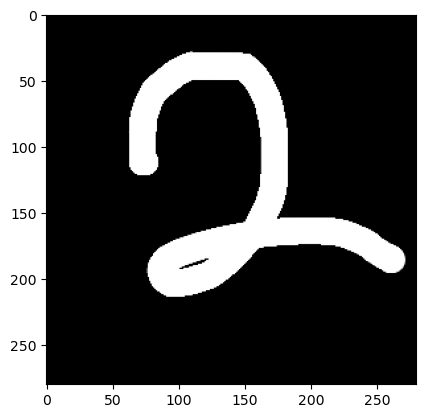

In [28]:
imgplot = plt.imshow(img)